In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
N = 1000

X = np.linspace(0,2,N)
Y = np.cos(X)
delta = X[1] - X[0]

In [10]:
delta*sum(Y), np.sin(2)

(0.9098815607204649, 0.9092974268256817)

In [16]:
error = []
for N in range(10,1000,20):

    X = np.linspace(0,2,N)
    Y = np.cos(X)
    delta = X[1] - X[0]
    error.append(delta*sum(Y) - np.sin(2))

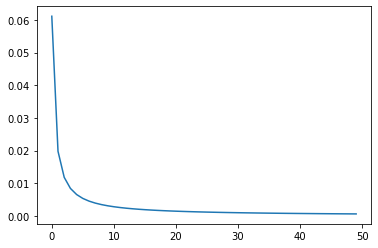

In [17]:
plt.plot(error);

In [46]:
N = 100

X = np.linspace(0,2,N)
weights = 2*np.ones_like(X)
weights[0] = weights[-1] =  1
Y = np.cos(X)
delta = X[1] - X[0]
delta*weights @ Y /2

0.9092665012870648

In [49]:
sum(weights)/len(weights)

1.98

In [45]:
N = 100

X = np.linspace(0,2,N)
weights = 2*np.ones_like(X)
weights[1::2] = 4
weights[0] = weights[-1] =  1
Y = np.cos(X)
delta = X[1] - X[0]
delta*weights @ Y / 3

0.9120379105066313

In [39]:
weights

array([1., 4., 2., 4., 2., 4., 2., 4., 2., 1.])

In [48]:
sum(weights)/len(weights)

1.98